In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
"""
STEP 1
THIS PORTION OF THE CODE FINDS ALL THE AVERAGES AND MEDIANS WIHTOUT THE ZEROS (CONFLICTS) AND GETS RID OF ALL THE DUPLICATES
USE THIS CODE TO CREATE THE "WITH GB" NO CONFLICTS DATAFRAME
"""
df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/nhfp grade data 2023.csv')

df_replaced = df.replace(0, pd.NA)

# Group by 'Applicant ID' and calculate mean and median, ignoring NaNs
result = df_replaced.groupby('Applicant ID')[['PP_grade1', 'PP_grade2', 'PP_grade3', 'PP_grade4']].agg(['mean', 'median'])

# Flatten MultiIndex columns
result.columns = ['_'.join(col) for col in result.columns]

# Reset index
result = result.reset_index()

result.to_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 grades no conflicts.csv', index=False)


In [ ]:
"""
STEP 2
THIS PORTION OF THE CODE FINDS ALL THE AVERAGES AND MEDIANS WIHTOUT THE ZEROS (CONFLICTS) AND GETS RID OF ALL THE DUPLICATES WHILE FACTORING OUT THE GB MATH
USE THIS CODE TO CREATE THE "WITHOUT GB" NO CONFLICTS DATAFRAME
"""
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/nhfp grade data 2023.csv')

# Apply the formula to PP_grade4 where PP_GB is 1
df['PP_grade4'] = df.apply(lambda row: ((row['PP_grade4'] - 1.25) / 0.75) if row['PP_GB'] == 1 else row['PP_grade4'], axis=1)

# Replace zeros with NaN
df_replaced = df.replace(0, pd.NA)

# Group by 'Applicant ID' and calculate mean and median, ignoring NaNs
result = df_replaced.groupby('Applicant ID')[['PP_grade1', 'PP_grade2', 'PP_grade3', 'PP_grade4']].agg(['mean', 'median'])

# Flatten MultiIndex columns
result.columns = ['_'.join(col) for col in result.columns]

# Reset index
result = result.reset_index()

# Save the result to a new CSV file
result.to_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 grades no conflicts no GB.csv', index=False)


In [ ]:
# #THIS PORTION COMBINES THE CSV ABOVE WIHT THE REST OF THE GRADE DATA
# import pandas as pd

# # Load the CSV data into DataFrames
# sheet1 = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024-260averaged_grades.csv')
# sheet2 = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024 Post-Triage NHFP Grade Analysis (with Golden Buzzer) - Sheet1.csv')

# # Ensure both DataFrames have an 'Applicant ID' column for matching
# if 'Applicant ID' not in sheet1.columns:
#     print("Error: 'Applicant ID' column not found in sheet1. Aborting.")
# elif 'Applicant ID' not in sheet2.columns:
#     print("Error: 'Applicant ID' column not found in sheet2. Aborting.")
# else:
#     # Set 'Applicant ID' as the index in sheet2
#     sheet2.set_index('Applicant ID', inplace=True)

#     # Update sheet2 with data from sheet1 based on 'Applicant ID'
#     sheet2.update(sheet1.set_index('Applicant ID'))

#     # Reset index in sheet2 (optional)
#     sheet2.reset_index(inplace=True)

#     # Save the updated sheet2 (same file)
#     sheet2.to_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024 Post-Triage NHFP Grade Analysis (with Golden Buzzer) - Sheet1.csv', index=False)
#     print("Applicant information in sheet2 updated successfully!")


Applicant information in sheet2 updated successfully!


<ipython-input-4-85d078d44b76>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
<ipython-input-4-85d078d44b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])


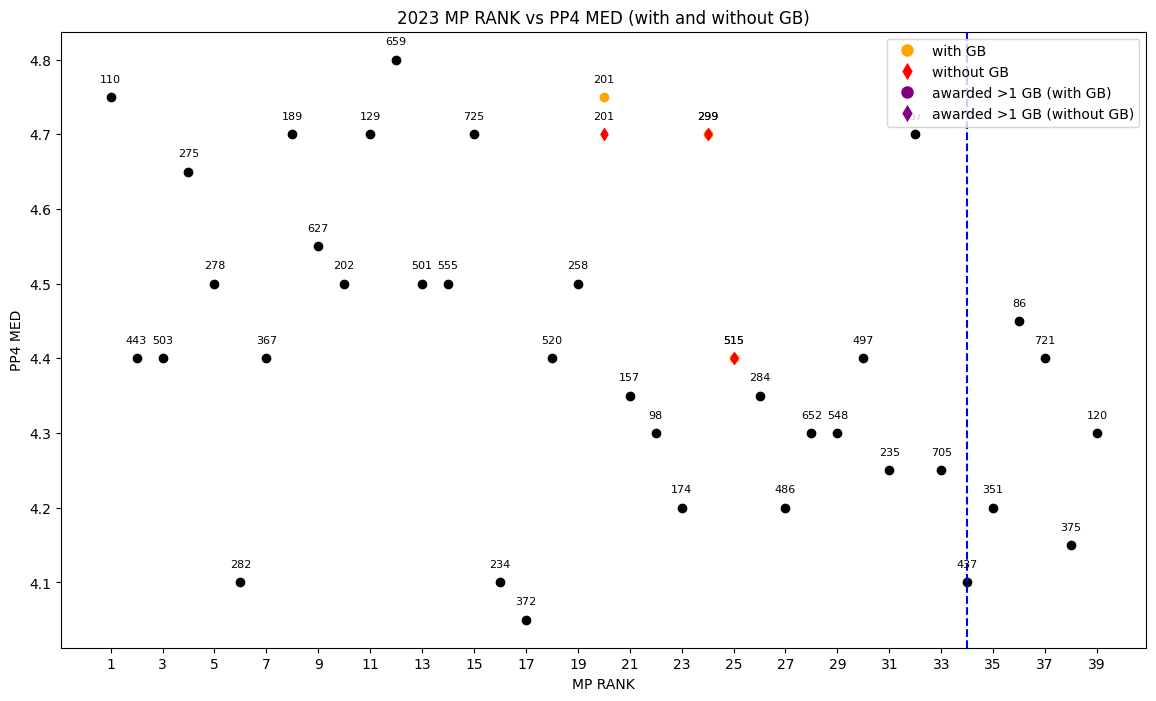

In [ ]:
"""
STEP 4
This code makes the increased readability plot for MP RANK vs PP4 MED with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')

# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['PP4 MED'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['PP4 MED'].iloc[i] + 0.02, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['PP4 MED'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['PP4 MED'].iloc[i] + 0.02, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP4 MED'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP4 MED'].iloc[i] + 0.02, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('PP4 MED')
plt.title('2023 MP RANK vs PP4 MED (with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs PP4 MED (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


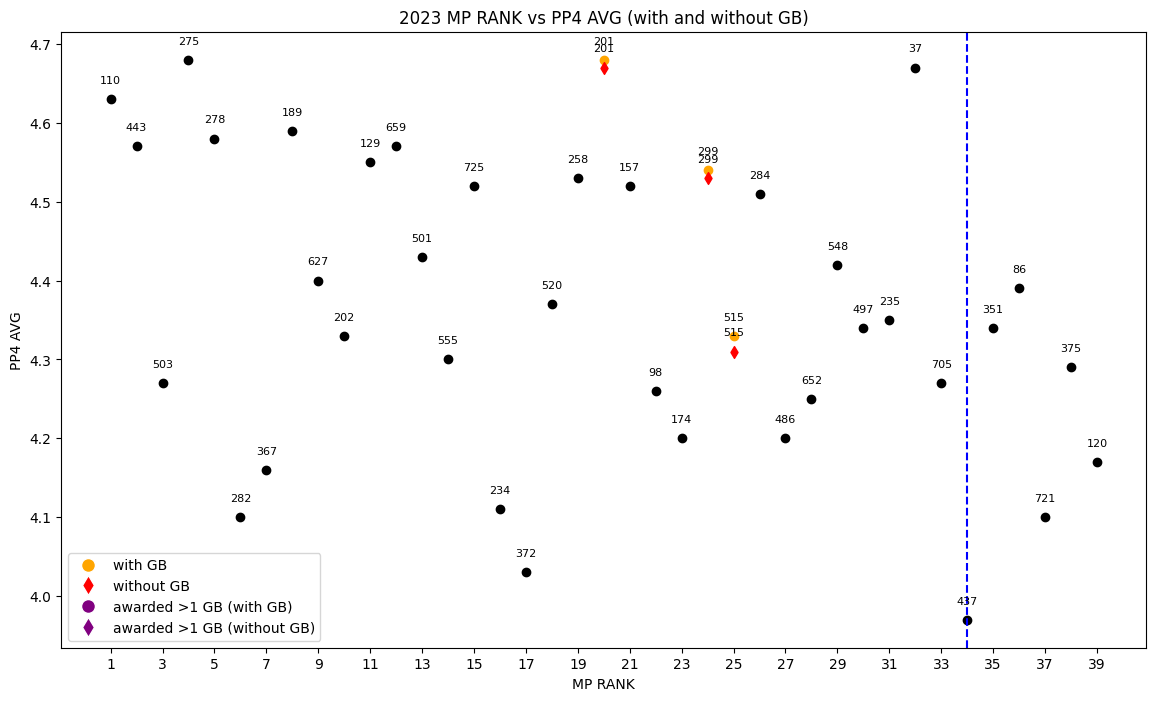

In [ ]:
"""
This code makes the increased readability plot for MP RANK vs PP4 AVG with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')

# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['PP4 AVG'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['PP4 AVG'].iloc[i] + 0.02, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['PP4 AVG'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['PP4 AVG'].iloc[i] + 0.02, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP4 AVG'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP4 AVG'].iloc[i] + 0.02, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('PP4 AVG')
plt.title('2023 MP RANK vs PP4 AVG (with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs PP4 AVG (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


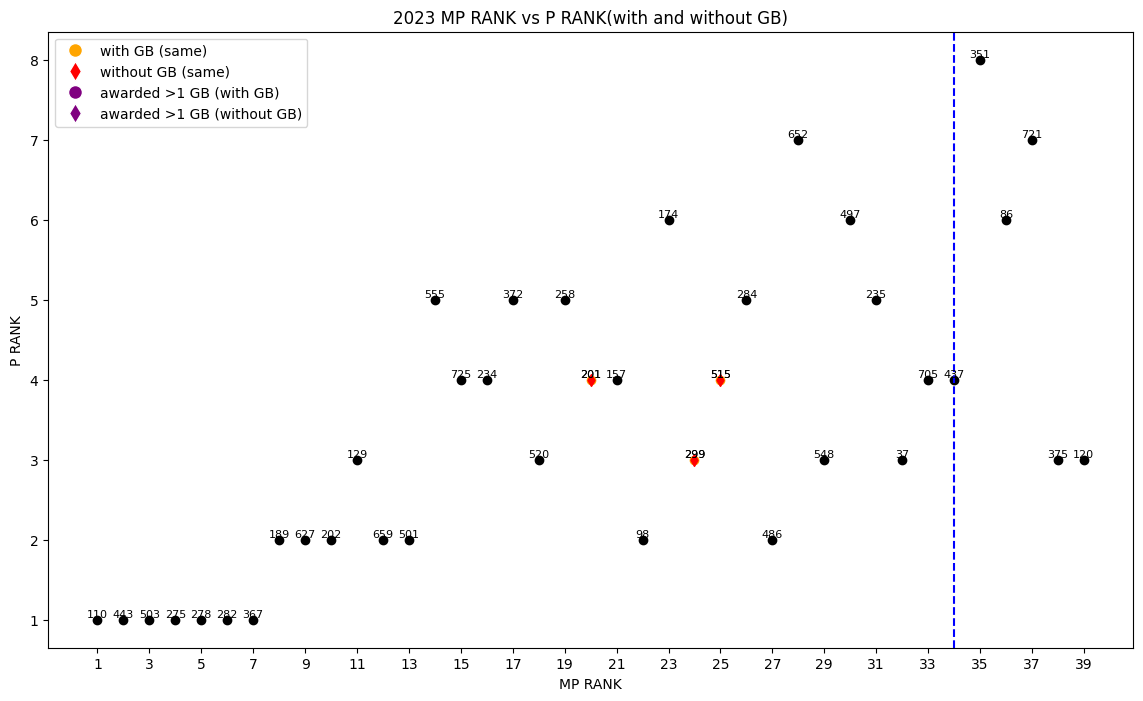

In [ ]:
"""
This code makes the increased readability plot for MP RANK vs P RANK with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')


# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['P RANK'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['P RANK'].iloc[i] + 0.03, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['P RANK'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['P RANK'].iloc[i] + 0.03, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['P RANK'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['P RANK'].iloc[i] + 0.03, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB (same)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB (same)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('P RANK')
plt.title('2023 MP RANK vs P RANK(with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs P RANK (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


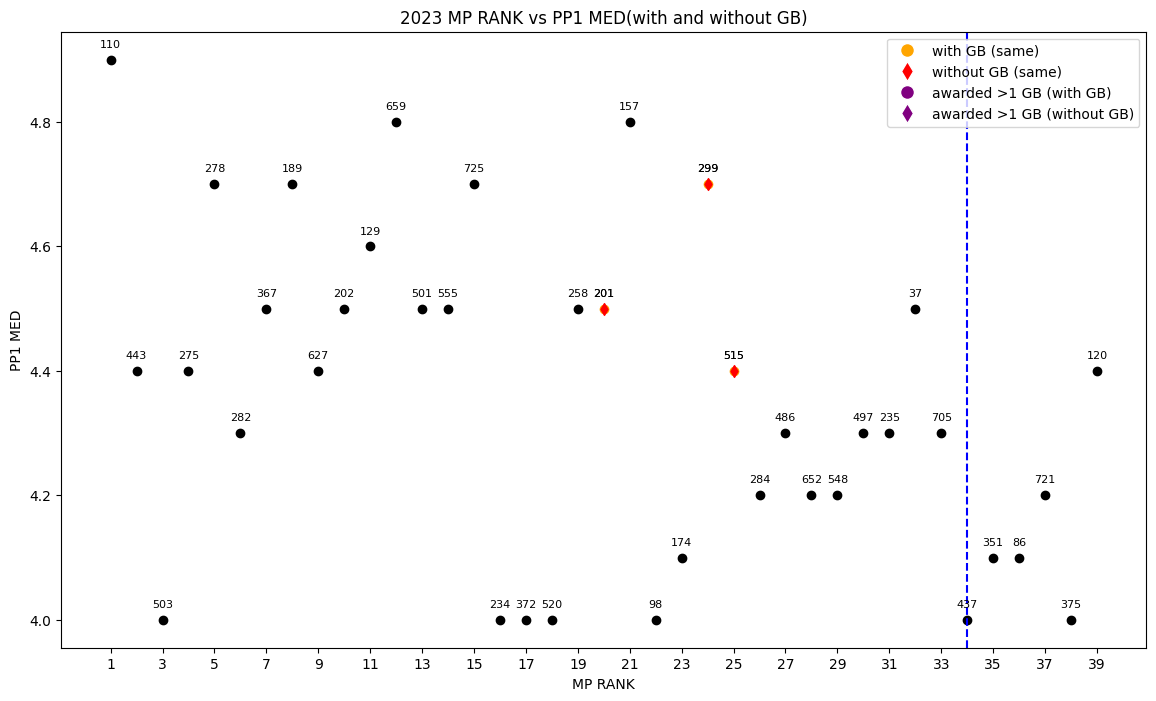

In [ ]:
"""
This code makes the increased readability plot for MP RANK vs PP1 MED with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')

# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['PP1 MED'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['PP1 MED'].iloc[i] + 0.02, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['PP1 MED'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['PP1 MED'].iloc[i] + 0.02, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP1 MED'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP1 MED'].iloc[i] + 0.02, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB (same)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB (same)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('PP1 MED')
plt.title('2023 MP RANK vs PP1 MED(with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs PP1 MED (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


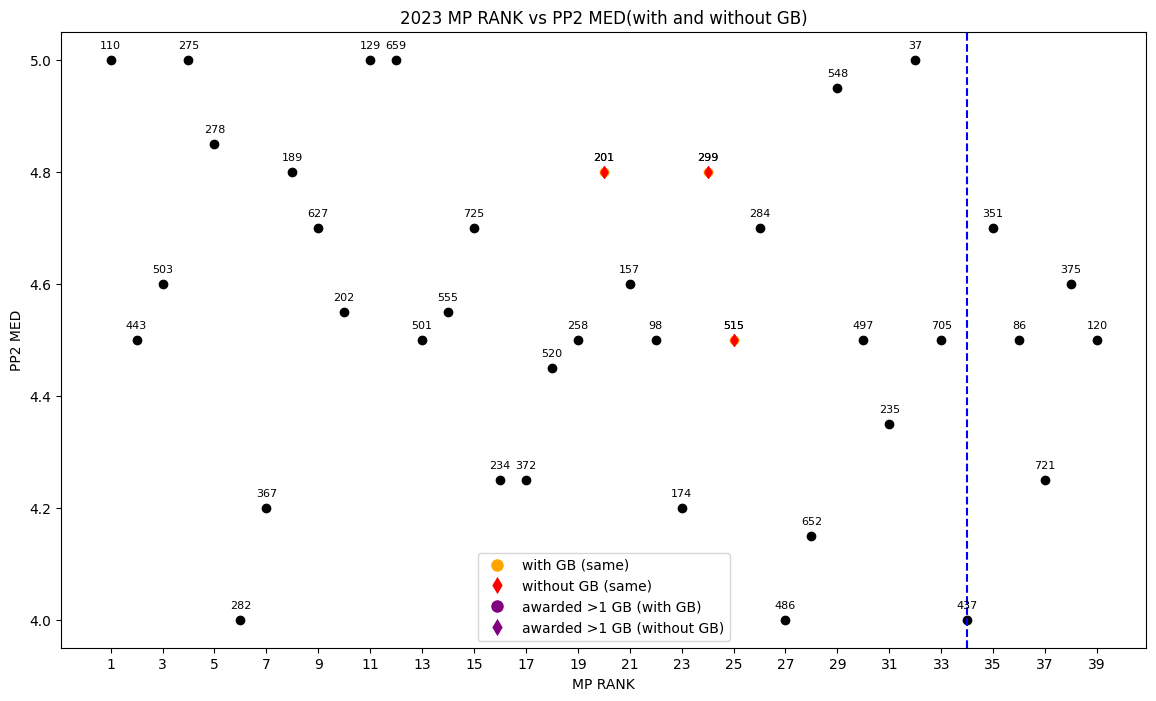

In [ ]:
"""
This code makes the increased readability plot for MP RANK vs PP2 MED with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')

# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['PP2 MED'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['PP2 MED'].iloc[i] + 0.02, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['PP2 MED'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['PP2 MED'].iloc[i] + 0.02, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP2 MED'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP2 MED'].iloc[i] + 0.02, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')


plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB (same)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB (same)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('PP2 MED')
plt.title('2023 MP RANK vs PP2 MED(with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs PP2 MED (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


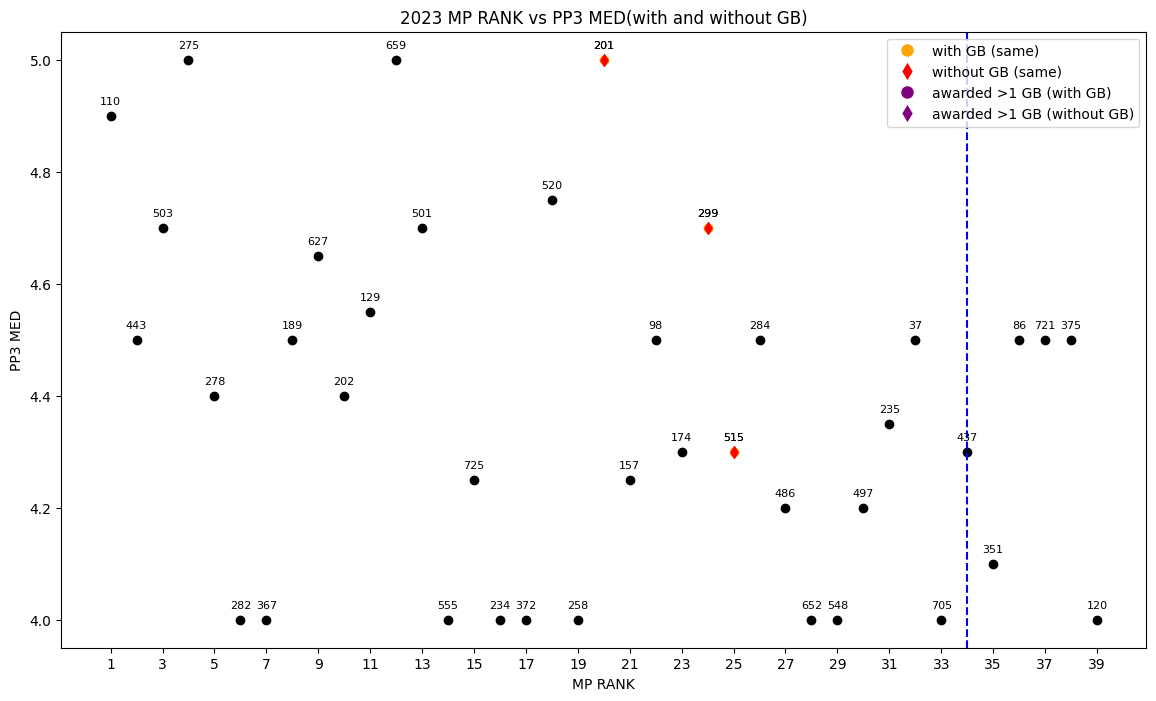

In [ ]:
"""
This code makes the increased readability plot for MP RANK vs PP3 MED with and without GB. You need 3 seperate data frames.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load data
app_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - excluding GB.csv')
gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - with GB.csv')
no_gb_df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2023/2023 Post-Triage Grades - NO GB.csv')

# Filter out "NONE" entries in MP RANK
app_df = app_df[app_df['MP RANK'] != 'NONE']
gb_df = gb_df[gb_df['MP RANK'] != 'NONE']
no_gb_df = no_gb_df[no_gb_df['MP RANK'] != 'NONE']

# Convert MP RANK to numeric
app_df['MP RANK'] = pd.to_numeric(app_df['MP RANK'])
gb_df['MP RANK'] = pd.to_numeric(gb_df['MP RANK'])
no_gb_df['MP RANK'] = pd.to_numeric(no_gb_df['MP RANK'])

# Specified Applicant IDs
highlight_ids = [276,444]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot data from app_df (all applicants as black points)
for i in range(len(app_df)):
    plt.scatter(app_df['MP RANK'].iloc[i], app_df['PP3 MED'].iloc[i], color='black', marker='o')
    plt.text(app_df['MP RANK'].iloc[i], app_df['PP3 MED'].iloc[i] + 0.02, str(app_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from gb_df (orange circles, purple if in highlight_ids)
for i in range(len(gb_df)):
    color = 'purple' if gb_df['Applicant ID'].iloc[i] in highlight_ids else 'orange'
    plt.scatter(gb_df['MP RANK'].iloc[i], gb_df['PP3 MED'].iloc[i], color=color, marker='o')
    plt.text(gb_df['MP RANK'].iloc[i], gb_df['PP3 MED'].iloc[i] + 0.02, str(gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')

# Plot data from no_gb_df (red diamonds, purple if in highlight_ids)
for i in range(len(no_gb_df)):
    color = 'purple' if no_gb_df['Applicant ID'].iloc[i] in highlight_ids else 'red'
    plt.scatter(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP3 MED'].iloc[i], color=color, marker='d')
    plt.text(no_gb_df['MP RANK'].iloc[i], no_gb_df['PP3 MED'].iloc[i] + 0.02, str(no_gb_df['Applicant ID'].iloc[i]), fontsize=8, ha='center', color='black')


plt.axvline(x=34, color='blue', linestyle='--', label='MP cutoff')

# Set x-axis ticks to every 2 spaces
plt.xticks(range(min(min(app_df['MP RANK']), min(gb_df['MP RANK']), min(no_gb_df['MP RANK'])),
                 max(max(app_df['MP RANK']), max(gb_df['MP RANK']), max(no_gb_df['MP RANK'])) + 1, 2))

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='with GB (same)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='red', markersize=10, label='without GB (same)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (with GB)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='purple', markersize=10, label='awarded >1 GB (without GB)')

]
plt.legend(handles=handles)

# Add labels and title
plt.xlabel('MP RANK')
plt.ylabel('PP3 MED')
plt.title('2023 MP RANK vs PP3 MED(with and without GB)')

save_dir = '/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/'
filename = f'{save_dir}2023 MP Rank vs PP3 MED (w & wo GB).png'
plt.savefig(filename, bbox_inches='tight')


# Show the plot
plt.show()


In [ ]:
"""
This code creates the chair/reviwer statistics csv file. It takes the average and medians of all the grades of each reviewer, counts how many times they had conflicts, counts how many applicants they reviewed, and how many GB they awarded.
"""
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024/nhfp grade data 2024(with GB).csv')

# Define the grades columns
grades_columns = ['PP_grade1', 'PP_grade2', 'PP_grade3', 'PP_grade4']

# Add a new column to indicate whether a row has all grades as zero
df['is_zero_row'] = df[grades_columns].sum(axis=1) == 0

# Count the number of rows of zeros for each reviewer
zero_counts = df[df['is_zero_row']].groupby(['Reviewer ID', 'Panel'])['is_zero_row'].sum().reset_index().rename(columns={'is_zero_row': 'zero_count'})

# Count the number of times each reviewer gave out the Golden Buzzer
golden_buzzer_counts = df[df['PP_GB'] == 1].groupby(['Reviewer ID', 'Panel'])['PP_GB'].count().reset_index().rename(columns={'PP_GB': 'golden_buzzer_count'})

# Count the number of applicants each reviewer reviewed
applicant_counts = df.groupby(['Reviewer ID', 'Panel'])['Reviewer Status'].count().reset_index().rename(columns={'Reviewer Status': 'applicant_count'})

# Filter out zero rows
df_non_zero = df[~df['is_zero_row']]

# Group by 'Reviewer ID' and 'Panel' and calculate averages and medians
grouped_non_zero = df_non_zero.groupby(['Reviewer ID', 'Panel'])

# Calculate averages and medians for each reviewer
aggregated_non_zero = grouped_non_zero[grades_columns].agg(['mean', 'median'])

# Flatten the MultiIndex columns
aggregated_non_zero.columns = ['_'.join(col).strip() for col in aggregated_non_zero.columns.values]

# Merge the aggregated data with the zero counts
result = aggregated_non_zero.reset_index().merge(zero_counts, on=['Reviewer ID', 'Panel'], how='left')

# Merge the result with the golden buzzer counts
result = result.merge(golden_buzzer_counts, on=['Reviewer ID', 'Panel'], how='left')

# Merge the result with the applicant counts
result = result.merge(applicant_counts, on=['Reviewer ID', 'Panel'], how='left')

# Add the 'Reviewer Status' column
reviewer_status = df[['Reviewer ID', 'Reviewer Status']].drop_duplicates()
result = result.merge(reviewer_status, on='Reviewer ID', how='left')

# Fill NaN zero counts and golden buzzer counts with 0
result['zero_count'] = result['zero_count'].fillna(0).astype(int)
result['golden_buzzer_count'] = result['golden_buzzer_count'].fillna(0).astype(int)

# Save the result to a new CSV file
result.to_csv('/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024/2024 nhfp_reviewer_statistics.csv', index=False)

print("New CSV file with reviewer statistics has been created.")


New CSV file with reviewer statistics has been created.


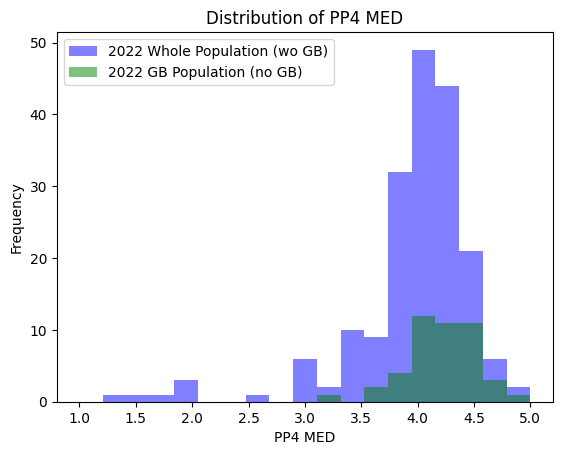

In [ ]:
"""
Golden Buzzer (GB) Histograms. Comaparing the entire grade population (without GB applicants)
"""
# df = pd.read_csv("/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024/2024 Post-Triage excluding GB.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2024/2024 Post-Triage - NO GB.csv")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load the data from the CSV files
df = pd.read_csv("/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2022/2022 Post-Triage excluding GB.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NASA Fellows Database Internship/NHFP Grades/2022/2022 Post-Triage  - NO GB.csv")

# Extract the "PP4 MED" columns
data1 = df["PP4 MED"]
data2 = df2["PP4 MED"]

# Define the bin sizes
bins = np.linspace(1, 5, 20)  # You can adjust the number of bins as needed

# Plot the histograms
plt.hist(data1, bins, alpha=0.5, label='2022 Whole Population (wo GB)', color='blue')
plt.hist(data2, bins, alpha=0.5, label='2022 GB Population (no GB)', color='green')

plt.legend(loc='upper left')
plt.xlabel('PP4 MED')
plt.ylabel('Frequency')
plt.title('Distribution of PP4 MED')

# Save the plot as a PNG file
save_path = "/content/drive/MyDrive/NASA Fellows Database Internship/Leads Meeting 7 30/2022/2022 histogram_plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()
